In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('cleaned_census_data Blessing.csv')
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,Unknown,Unknown
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,Unknown,Unknown
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,Unknown,Female,Student,Unknown,Unknown
3,1,Simmons Meadow,Henry,Bradley,5,Son,Unknown,Male,Student,Unknown,Unknown
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,Unknown,Unknown


In [5]:
df.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int64
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

#### (a) What should be built on an unoccupied plot of land that the local government wishes to develop?  

We examine the data using visualizations to help us understand the various options available to us and make an informed decision backed by data.

In [47]:
# bin age

bins = [0,15,25,65,140]

df['bin_age'] = pd.cut(df.Age, bins)


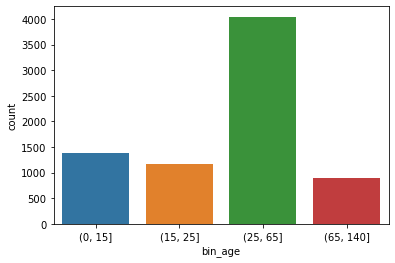

In [48]:
# graph Age brackets

sns.countplot(x='bin_age',data=df)  
plt.show() 

observation: most of the population in the town fall within the age of 25 - 65 years. They are the young adults and working population.



In [41]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,bin_age
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,Unknown,Unknown,"(40, 60]"
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,Unknown,Unknown,"(40, 60]"
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,Unknown,Female,Student,Unknown,Unknown,"(0, 20]"
3,1,Simmons Meadow,Henry,Bradley,5,Son,Unknown,Male,Student,Unknown,Unknown,"(0, 20]"
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,Unknown,Unknown,"(20, 40]"


In [58]:
# Count of each occupation type

occupation_count = df['Occupation'].value_counts()#.to_frame()
occupation_count

Student                                         1381
Unemployed                                       535
University Student                               486
Child                                            394
PhD Student                                       19
                                                ... 
Retired Ceramics designer                          1
Retired Arboriculturist                            1
Retired Outdoor activities/education manager       1
Retired Radio broadcast assistant                  1
Retired Museum/gallery conservator                 1
Name: Occupation, Length: 1099, dtype: int64

In [59]:
# converting to df and assigning new names to the columns
df_occupation_count = pd.DataFrame(df_occupation_count)
df_occupation_count = df_occupation_count.reset_index()
df_occupation_count.columns = ['Occupation', 'Count_of_occupation'] # change column names
df_occupation_count

,Occupation,Count_of_occupation
0,Student,1381
1,Unemployed,535
2,University Student,486
3,Child,394
4,PhD Student,19
...,...,...
1094,Retired Ceramics designer,1
1095,Retired Arboriculturist,1
1096,Retired Outdoor activities/education manager,1
1097,Retired Radio broadcast assistant,1


In [61]:
top_n_occupation_count = df_occupation_count[df_occupation_count.Count_of_occupation >= 13 ]
top_n_occupation_count

,Occupation,Count_of_occupation
0,Student,1381
1,Unemployed,535
2,University Student,486
3,Child,394
4,PhD Student,19
5,Engineering geologist,16
6,Retail banker,14
7,Recycling officer,14
8,"Surveyor, building",13
9,Technical author,13


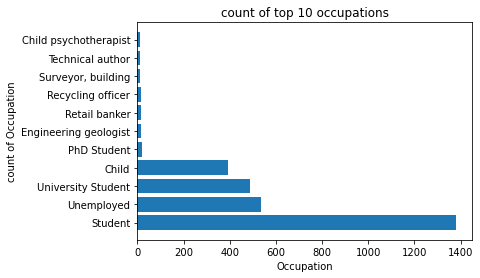

In [68]:
plt.barh(y = 'Occupation', width = 'Count_of_occupation', data = top_n_occupation_count)
plt.title('count of top 10 occupations')
plt.xlabel('Occupation')
plt.ylabel('count of Occupation')
plt.show() 